En este programita vamos a ver la posicion de los cumulos globulares en coordenadas ecuatoriales y galacticas (Harris 1996).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


En el dataset modificado usamos la coma para separar columnas, y a las coordenadas ecuatoriales se las separó en tres columnas, rag para grados, ram para minutos y asi con la right ascention, y con la declination respectivamente. Obtenemos seis columnas para estas coordenadas, mientas que para l y b solo tenemos dos columnas.

In [2]:
datos=pd.read_csv("data.dat",usecols=['rag','ram','ras','deg','dem','des','L','B']) 
datos.head() #verificamos que todo esté en orden.

,rag,ram,ras,deg,dem,des,L,B
0,0,24,5.67,-72,-4,-52.6,305.89,-44.89
1,0,52,45.24,-26,-34,-57.4,152.30,-89.38
2,1,3,14.26,-70,-50,-55.6,301.53,-46.25
3,2,2,57.00,-3,-15,-10.0,161.22,60.76
4,3,12,16.21,-55,-12,-58.4,270.54,52.12


In [3]:
datos.describe() #Esto no nos sirve a nosotros en estos momentos, pero no está demás hacer esto.


,rag,ram,ras,deg,dem,des,L,B
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,15.515924,27.426752,28.755478,-20.140127,-19.312102,-22.447771,164.157834,16.025350
std,4.508688,17.441552,17.346539,27.278586,27.752305,28.033040,151.686059,21.896664
min,0.000000,0.000000,0.600000,-82.000000,-59.000000,-58.400000,0.070000,-89.380000
25%,15.000000,12.000000,12.760000,-34.000000,-42.000000,-46.500000,9.890000,4.320000
50%,17.000000,27.000000,28.520000,-25.000000,-21.000000,-27.300000,87.100000,10.440000
75%,18.000000,41.000000,43.920000,-4.000000,-3.000000,-7.900000,332.960000,23.270000
max,23.000000,59.000000,59.710000,79.000000,58.000000,56.800000,359.590000,79.760000


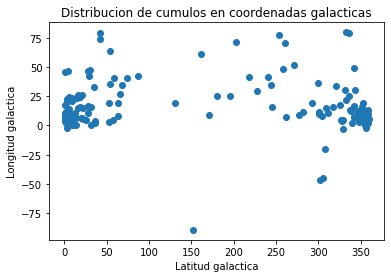

In [4]:
plt.scatter(datos.L,datos.B,) #Gráfico en coordenadas galacticas. Podemos ver cómo los cúmulos se agrupan en el
plt.title("Distribucion de cumulos en coordenadas galacticas") #origen, es decir cerca del centro de la galaxia.
plt.ylabel("Longitud galactica") #Tambien es notable la poca cantidad de cumulos en valores negativos de B.
plt.xlabel("Latitud galactica")
plt.show();

In [5]:
RA=[]   #Aquí creamos listas para RA y DEC, y las llenamos con los datos de las seis columnas del dataframe
DEC=[]  #En el grafico notamos que la RA va solo hasta 20°.
for i in datos.index:
    x=(datos["rag"][i]*3600+datos["ram"][i]*60+datos["ras"][i])/3600
    y=(datos["deg"][i]*3600+datos["dem"][i]*60+datos["des"][i])/3600
    RA.append(x)
    DEC.append(y)
ec=pd.DataFrame({"RA":RA,
                "DEC":DEC})

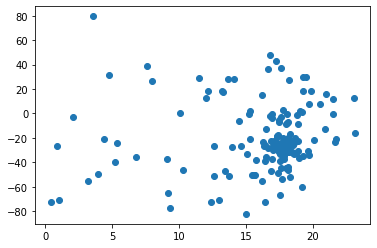

In [6]:
plt.scatter(ec.RA,ec.DEC)

In [7]:
salchicha=pd.read_csv("data.dat",index_col=['Name']) #Por último buscamos a los cúmulos que provienen de la 
ngc1851=salchicha.loc["NGC_1851"]                    #famosa salchicha cósmica, y vemos sus datos completos
ngc2298=salchicha.loc["NGC_2298"]                    #RA, DEC, L, B y tambien distancia al sol, distancia al
ngc5286=salchicha.loc["NGC_5286"]                    #centro galactico, y valores cartesianos de l y b.
m2=salchicha.loc["NGC_7089"]
m56=salchicha.loc["NGC_6779"]
m75=salchicha.loc["NGC_6864"]
m79=salchicha.loc["NGC_1904"]
print(ngc1851)
print(ngc2298)
print(ngc5286)
print(m2)
print(m56)
print(m75)
print(m79)

rag        5.00
ram       14.00
ras        6.76
deg      -40.00
dem       -2.00
des      -47.60
L        244.51
B         35.03
R_Sun     12.10
R_gc      16.60
X          4.20
Y          8.90
Z          6.90
Name: NGC_1851, dtype: float64
rag        6.00
ram       48.00
ras       59.41
deg      -36.00
dem        0.00
des      -19.10
L        245.63
B         16.00
R_Sun     10.80
R_gc      15.80
X          4.30
Y          9.40
Z          3.00
Name: NGC_2298, dtype: float64
rag       13.00
ram       46.00
ras       26.81
deg      -51.00
dem      -22.00
des      -27.30
L        311.61
B         10.57
R_Sun     11.70
R_gc       8.90
X          7.60
Y          8.60
Z          2.10
Name: NGC_5286, dtype: float64
rag      21.00
ram      33.00
ras      27.02
deg       0.00
dem     -49.00
des     -23.70
L        53.37
B        35.77
R_Sun    11.50
R_gc     10.40
X         5.60
Y         7.50
Z         6.70
Name: NGC_7089, dtype: float64
rag      19.00
ram      16.00
ras      35.57
deg      30.

Referencia:

Harris, W.E. 1996, AJ, 112, 1487